In [1]:
from RBF_Net import RBF_Net
import math
import numpy as np
import matplotlib.pyplot as plt

In [16]:
X_train = np.arange(0, 2*math.pi, 0.1)
X_train = X_train.reshape(1, X_train.shape[0])

X_test = np.arange(0.05, 2*math.pi, 0.1)
X_test = X_test.reshape(1, X_test.shape[0])

In [17]:
def sin_2(x):
    return np.sin(2*x)

In [18]:
f_train = sin_2(X_train)
f_test = sin_2(X_test)

In [117]:
dim_list = [2, 3, 5, 10, 20]
errors = []
for H_dim in dim_list:
    rbf_net = RBF_Net(X_train, f_train.T, H_dim, weight_learn = 'delta')
    rbf_net.epochs = 100
    rbf_net.train()
    f_approx = rbf_net.predict(X_test).flatten()
    test_error = np.mean(np.abs(f_approx - f_test))
    errors.append(test_error)
    print("Number of nodes: {}, Error: {}".format(H_dim, test_error))
plt.plot(dim_list, errors)

Number of nodes: 2, Error: 0.6396842422780272
Number of nodes: 3, Error: 0.5621238962282409
Number of nodes: 5, Error: 0.33538233050237637
Number of nodes: 10, Error: 0.24553312443621567


KeyboardInterrupt: 

Text(0.5, 1.0, 'Sine function')

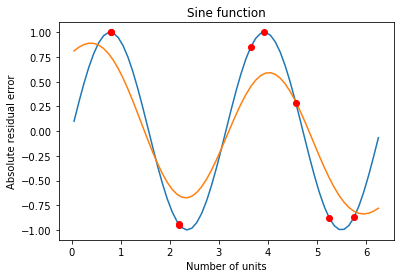

In [121]:
rbf_net = RBF_Net(X_train, f_train.T, 9, weight_learn = 'delta', CL = True)
#plt.plot(rbf_net.mus, sin_2(rbf_net.mus), 'bo', color = 'b')
rbf_net.epochs = 500
rbf_net.eta = 0.01
rbf_net.winners = 2
rbf_net.train()
f_approx = rbf_net.predict(X_test).flatten()
plt.plot(X_test[0], f_test[0])
plt.plot(X_test[0], f_approx)
plt.plot(rbf_net.mus, sin_2(rbf_net.mus), 'bo', color = 'r')
plt.xlabel("Number of units")
plt.ylabel("Absolute residual error")
plt.title("Sine function")

Obtained error [0.2614732258178707]


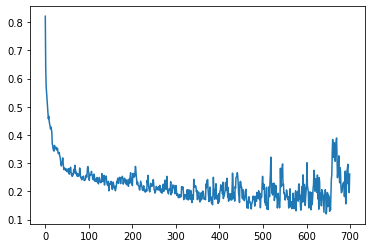

In [36]:
rbf_net.plot_errors()

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train = [i.strip().split() for i in open("data_lab2/ballist.dat").readlines()]
test = [i.strip().split() for i in open("data_lab2/balltest.dat").readlines()]

In [3]:
for i in range(len(train)):
    for j in range(4):
        train[i][j] = float(train[i][j])

In [4]:
for i in range(len(test)):
    for j in range(4):
        test[i][j] = float(test[i][j])

In [5]:
train = np.array(train)
test = np.array(test)

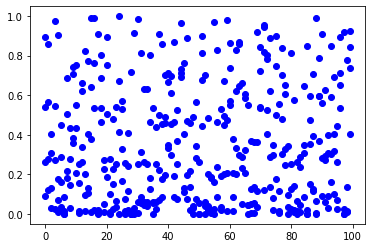

In [6]:
plt.plot(train, 'bo')

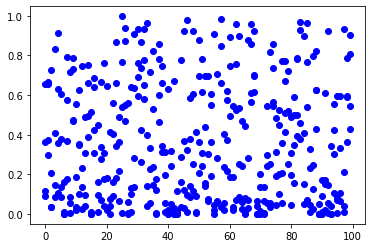

In [7]:
plt.plot(test, 'bo')

In [8]:
X_train = train[:,:2].T
y_train = train[:,2:].T
X_test = test[:,:2].T
y_test = test[:,2:].T

Text(0.5, 1.0, 'Train')

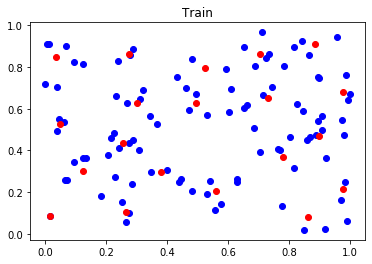

In [54]:
from RBF_Net_2dim import RBF_Net_2dim
rbf_net = RBF_Net_2dim(X_train, y_train.T, 20, weight_learn = 'delta', CL = True)
#plt.plot(rbf_net.mus, sin_2(rbf_net.mus), 'bo', color = 'b')
rbf_net.epochs = 100
rbf_net.eta = 0.01
rbf_net.winners = 1
rbf_net.train()
plt.plot(X_train.T[:,0], X_train.T[:,1], 'bo')
plt.plot(rbf_net.mus[:,0], rbf_net.mus[:,1], 'ro')
#plt.plot(rbf_net.mus, sin_2(rbf_net.mus), 'bo', color = 'r')
plt.title("Train")

Text(0.5, 1.0, 'Test')

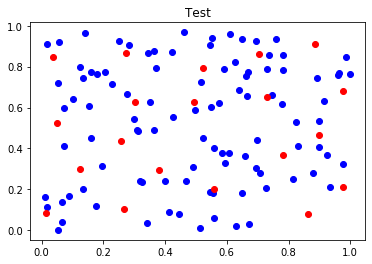

In [55]:
plt.plot(X_test.T[:,0], X_test.T[:,1], 'bo')
plt.plot(rbf_net.mus[:,0], rbf_net.mus[:,1], 'ro')
plt.title("Test")

In [10]:
x1 = np.array([0.277, 0.434])
x2 = np.array([0.629, 0.251])
np.matmul((x1 - x2).T, (x1 - x2))

0.15739299999999998

In [11]:
x1.shape

(2,)

In [15]:
def gaussian_rbf(x, mu, sigma):
    return np.exp(-np.square(x - mu)/(2*np.square(sigma)))

In [16]:
def gaussian_rbf_2(x, mu, sigma):
        vec = -np.square(x - mu)/(2*np.square(sigma))
        exp_vec = np.array([math.exp(i) for i in vec])
        return exp_vec

In [17]:
x = np.array([0.896, 0.54])
mu_j = np.array([0.23804171028889598, 0.708492968378368])
sigma_j = 1.0
gaussian_rbf(x, mu_j, sigma_j)

array([0.80536913, 0.98590533])

In [19]:
import math
gaussian_rbf_2(x, mu_j, sigma_j)

array([0.80536913, 0.98590533])

In [14]:
x.shape

(2,)

In [15]:
mu_j.shape

(2,)

In [13]:
np.exp(np.array([-0.01731244879613656, -0.03784540490649139]))

array([0.98283655, 0.96286178])